# 官網找資料

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
pd.options.mode.chained_assignment = None
%matplotlib inline


In [3]:
def loadingdata(path):
    # import dataset
    df = pd.read_csv(path)
    print (df.isnull().sum())
    print ('Number of Original Dataset : %d' % (df.shape[0]))
    print ('Number of Drop NaN         : %d' % (df.dropna(axis = 0).shape[0]))
    return df

def preprocessing(df, con_normal):
    # labeling botnet
    bot = df[~con_normal]
    nonbot = df[con_normal]
    bot["label"] = 1
    nonbot["label"] = 0
    df = pd.concat([bot, nonbot])
    df = df.drop(["Label"], axis=1).reset_index(drop=True)
    print('Number of Botnet : %d' % (bot.shape[0]))
    print('Number of Normal : %d' % (nonbot.shape[0]))
    
    # missing value filling by mode
    df.Sport = df.Sport.fillna(value=df[~(df['Sport'].isnull())].Sport.mode()[0])
    df.Dport = df.Dport.fillna(value=df[~(df['Dport'].isnull())].Dport.mode()[0])
    df.State = df.State.fillna(value=df[~(df['State'].isnull())].State.mode()[0])
    df.sTos = df.sTos.fillna(value=df[~(df['sTos'].isnull())].sTos.mode()[0])
    df.dTos = df.dTos.fillna(value=df[~(df['dTos'].isnull())].dTos.mode()[0])
    
    # StartTime & EndTime to second
    con0 = pd.DataFrame(df.StartTime.str.split('/', 3).tolist(), columns = ['year', 'month', 'a'])
    con1 = pd.DataFrame(con0.a.str.split(':', 3).tolist(), columns = ['b', 'mins', 'sec'])
    con2 = pd.DataFrame(con1.b.str.split(' ', 2).tolist(), columns = ['day', 'hr'])
    con2.hr = pd.to_numeric(con2.hr, errors='coerce')
    con1.mins = pd.to_numeric(con1.mins, errors='coerce')
    con1.sec = pd.to_numeric(con1.sec, errors='coerce')
    df["StartTime"] = con2.hr*3600 + con1.mins*60 + con1.sec
    
    # select row of Sport is 16-bit
    con0 = pd.DataFrame(df.Sport.str.split('x',2).tolist(), columns = ['Sport','y'])
    Sport_16 = df.iloc[con0[~(con0['y'].isnull())].index,:].reset_index(drop=True)
    # 16 to 10
    Sport_16_ = Sport_16[["Sport"]]
    a=[]
    for i in range(Sport_16_.shape[0]):
        x = int(Sport_16_.iloc[i,].Sport, 16)
        a.append(x)
    Sport_10 = pd.DataFrame(a, columns=["Sport_10"])
    Sport_16["Sport"] = Sport_10.Sport_10
    df = pd.concat([df.iloc[con0[(con0['y'].isnull())].index,:], Sport_16], axis=0).reset_index(drop=True)
    del Sport_16
    del Sport_16_
    
    # select row of Dport is 16-bit
    con0 = pd.DataFrame(df.Dport.str.split('x',2).tolist(), columns = ['Sport','y'])
    Dport_16 = df.iloc[con0[~(con0['y'].isnull())].index,:].reset_index(drop=True)
    # 16 to 10
    Dport_16_ = Dport_16[["Dport"]]
    a=[]
    for i in range(Dport_16_.shape[0]):
        x = int(Dport_16_.iloc[i,].Dport, 16)
        a.append(x)
    Dport_10 = pd.DataFrame(a, columns=["Dport_10"])
    Dport_16["Dport"] = Dport_10.Dport_10
    df = pd.concat([df.iloc[con0[(con0['y'].isnull())].index,:], Dport_16], axis=0).reset_index(drop=True)
    del Dport_16
    del Dport_16_
    df = df.sort_values(by=["StartTime"]).reset_index(drop=True)
    return df

In [4]:
path_10 = "capture20110810.binetflow.txt"
df_10 = loadingdata(path_10)
con_normal = (df_10.SrcAddr != "147.32.84.165")
df_10_new = preprocessing(df_10, con_normal)
df_10_new.to_csv("20110810_preprocessing.txt", index=False)


StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport          9379
Dir               0
DstAddr           0
Dport          4390
State             1
sTos          10590
dTos         195190
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64
Number of Original Dataset : 2824636
Number of Drop NaN         : 2619340
Number of Botnet : 40961
Number of Normal : 2783675


1. fillna by mode
2. StartTime convert to sencond
3. Sport and Dport which contain 16-bit convert to 10-bit
4. label dataset by botnet IP_address

In [5]:
path_11 = "capture20110811.binetflow.txt"
df_11 = loadingdata(path_11)

con_normal = (df_11.SrcAddr != "147.32.84.165")
df_11_new = preprocessing(df_11, con_normal)

df_11_new.to_csv("20110811_preprocessing.txt", index=False)

StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport          3993
Dir               0
DstAddr           0
Dport          2973
State             0
sTos           4324
dTos         269835
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64
Number of Original Dataset : 1808122
Number of Drop NaN         : 1534307
Number of Botnet : 20941
Number of Normal : 1787181


In [6]:
path_19 = "capture20110819.binetflow.txt"
df_19 = loadingdata(path_19)

con_normal = (df_19.SrcAddr != "147.32.84.165")&(df_19.SrcAddr != "147.32.84.191")&(df_19.SrcAddr != "147.32.84.192") 
df_19_new = preprocessing(df_19, con_normal)
df_19_new.to_csv("20110819_preprocessing.txt", index=False)


StartTime        0
Dur              0
Proto            0
SrcAddr          0
Sport         1812
Dir              0
DstAddr          0
Dport          837
State            0
sTos          2059
dTos         28267
TotPkts          0
TotBytes         0
SrcBytes         0
Label            0
dtype: int64
Number of Original Dataset : 325471
Number of Drop NaN         : 295270
Number of Botnet : 2143
Number of Normal : 323328


### visualization

In [7]:
df_10_new.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,label
0,35213.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,0
1,35213.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,0
2,35213.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,0
3,35213.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,0
4,35213.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,0


0.7766487434133106


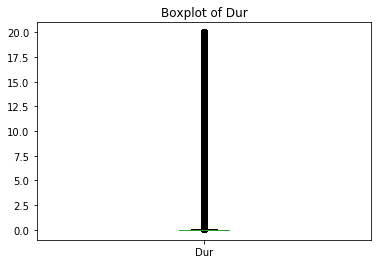

In [8]:
d = df_10_new[(df_10_new.Dur <= 20)]
print (d.shape[0]/df_10_new.shape[0])
d.Dur.plot(kind="box", title="Boxplot of Dur")
plt.show()